In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv("sample_submission.csv")

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
train


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,1,4,...,80,0,10,2,4,10,0,0,8,0
1673,1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,1,...,80,1,10,3,4,4,2,1,3,0
1674,1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,1,2,...,80,0,1,2,3,1,0,0,0,1
1675,1675,36,Travel_Rarely,441,Sales,9,2,Marketing,1,2,...,80,2,10,3,2,10,3,0,8,0


In [5]:
df.drop(["EmployeeCount", "EmployeeNumber","Over18", "StandardHours"], axis=1, inplace=True)

In [6]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.shape

(1470, 31)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

<Axes: >

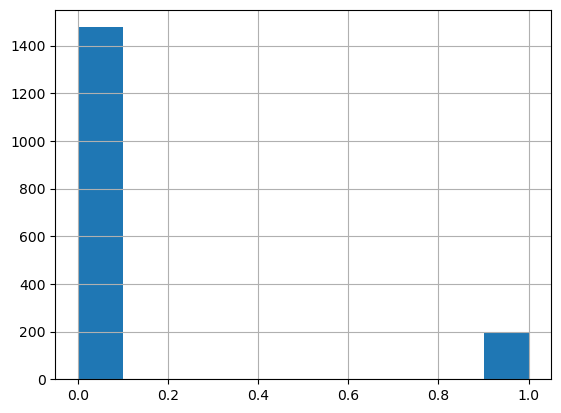

In [10]:
train.Attrition.hist()

In [11]:
class conf:
    index = 'id'
    target = 'Attrition'
    random = 2023
    
    load_original = True
np.random.seed(conf.random)

In [12]:
num_cols = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate",
            "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears",
            "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", 
            "YearsSinceLastPromotion", "YearsWithCurrManager",
            "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
            "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
            "StockOptionLevel", "WorkLifeBalance"]
cat_cols = ["BusinessTravel", "Department", "Education", "EducationField",
            "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"]

In [13]:
X = train.copy()
y = train.Attrition

In [14]:
Z = X.drop('Attrition',axis=1)

In [15]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [16]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1672    0
1673    0
1674    1
1675    0
1676    0
Name: Attrition, Length: 1677, dtype: int64

In [17]:
full_pip=ColumnTransformer([
    ('num',StandardScaler(),num_cols),
    ('cat',OrdinalEncoder(),cat_cols)
])

In [18]:
x=full_pip.fit_transform(Z)

In [19]:
x = full_pip.fit_transform(Z)
transformed_feature_names = full_pip.get_feature_names_out()
print("Transformed Feature Names:")
print(transformed_feature_names)
print("Shape of transformed feature matrix (x):", x.shape)

Transformed Feature Names:
['num__Age' 'num__DailyRate' 'num__DistanceFromHome' 'num__HourlyRate'
 'num__MonthlyIncome' 'num__MonthlyRate' 'num__NumCompaniesWorked'
 'num__PercentSalaryHike' 'num__TotalWorkingYears'
 'num__TrainingTimesLastYear' 'num__YearsAtCompany'
 'num__YearsInCurrentRole' 'num__YearsSinceLastPromotion'
 'num__YearsWithCurrManager' 'num__EnvironmentSatisfaction'
 'num__JobInvolvement' 'num__JobLevel' 'num__JobSatisfaction'
 'num__PerformanceRating' 'num__RelationshipSatisfaction'
 'num__StockOptionLevel' 'num__WorkLifeBalance' 'cat__BusinessTravel'
 'cat__Department' 'cat__Education' 'cat__EducationField' 'cat__Gender'
 'cat__JobRole' 'cat__MaritalStatus' 'cat__Over18' 'cat__OverTime']
Shape of transformed feature matrix (x): (1677, 31)


In [20]:
num_cols = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate",
            "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears",
            "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", 
            "YearsSinceLastPromotion", "YearsWithCurrManager",
            "EnvironmentSatisfaction", "JobInvolvement", "JobLevel",
            "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
            "StockOptionLevel", "WorkLifeBalance"]

cat_cols = ["BusinessTravel", "Department", "EducationField",
            "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"]

# Apply ColumnTransformer correctly
full_pip = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OrdinalEncoder(), cat_cols)
])

# Transform the DataFrame Z
x = full_pip.fit_transform(Z)
transformed_feature_names = full_pip.get_feature_names_out()

# Print the transformed feature names and shape
print("Transformed Feature Names:")
print(transformed_feature_names)
print("Shape of transformed feature matrix (x):", x.shape)

Transformed Feature Names:
['num__Age' 'num__DailyRate' 'num__DistanceFromHome' 'num__HourlyRate'
 'num__MonthlyIncome' 'num__MonthlyRate' 'num__NumCompaniesWorked'
 'num__PercentSalaryHike' 'num__TotalWorkingYears'
 'num__TrainingTimesLastYear' 'num__YearsAtCompany'
 'num__YearsInCurrentRole' 'num__YearsSinceLastPromotion'
 'num__YearsWithCurrManager' 'num__EnvironmentSatisfaction'
 'num__JobInvolvement' 'num__JobLevel' 'num__JobSatisfaction'
 'num__PerformanceRating' 'num__RelationshipSatisfaction'
 'num__StockOptionLevel' 'num__WorkLifeBalance' 'cat__BusinessTravel'
 'cat__Department' 'cat__EducationField' 'cat__Gender' 'cat__JobRole'
 'cat__MaritalStatus' 'cat__Over18' 'cat__OverTime']
Shape of transformed feature matrix (x): (1677, 30)


In [21]:
x.shape

(1677, 30)

In [22]:
print(x.shape)

(1677, 30)


In [23]:
print("Z DataFrame Info:")
print(Z.info())

# Print num_cols and cat_cols
print("Numerical Columns (num_cols):")
print(num_cols)
print("Categorical Columns (cat_cols):")
print(cat_cols)

# Apply ColumnTransformer and inspect the transformed feature matrix
x = full_pip.fit_transform(Z)
print("Shape of transformed feature matrix (x):", x.shape)

# Print transformed feature names
transformed_feature_names = full_pip.get_feature_names_out()
print("Transformed Feature Names:")
print(transformed_feature_names)

Z DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRol

In [24]:
df_test=full_pip.fit_transform(test)

In [25]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1672    0
1673    0
1674    1
1675    0
1676    0
Name: Attrition, Length: 1677, dtype: int64

In [26]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=7, shuffle=True)

In [27]:
RF_model=RandomForestRegressor(n_estimators=78, max_depth=7)
RF_model.fit(x_train,y_train)
y_pred=RF_model.predict(x_val)
roc_auc_score(y_val, y_pred)

0.8545513443472628

In [28]:
y_pred

array([0.01319153, 0.03322049, 0.00741306, 0.11862143, 0.11259822,
       0.11510734, 0.04705286, 0.0098121 , 0.17964677, 0.07730439,
       0.0196733 , 0.23898952, 0.1006839 , 0.1020808 , 0.09983633,
       0.03075548, 0.05265402, 0.13231478, 0.00930638, 0.38617765,
       0.03180072, 0.45092044, 0.0822736 , 0.08025169, 0.04822009,
       0.20711824, 0.25135047, 0.01728585, 0.03651113, 0.5924499 ,
       0.54126233, 0.02616313, 0.44497355, 0.07869635, 0.15544889,
       0.30681063, 0.28466046, 0.30239596, 0.00700533, 0.03730044,
       0.36626246, 0.01092754, 0.15338684, 0.0092107 , 0.02546416,
       0.09843743, 0.04784607, 0.01327581, 0.1552544 , 0.01514536,
       0.41227976, 0.20921011, 0.24674405, 0.07573937, 0.04725326,
       0.3159197 , 0.05543617, 0.00824655, 0.02176718, 0.02802311,
       0.01423045, 0.30672069, 0.03912285, 0.08343529, 0.08861076,
       0.57025208, 0.00932258, 0.51422121, 0.03568215, 0.05947017,
       0.12605578, 0.03262524, 0.0915446 , 0.06421272, 0.08505

In [29]:
x_val

array([[ 0.34840416,  1.20264152,  0.04039472, ...,  1.        ,
         0.        ,  0.        ],
       [-0.59226603, -0.91015914, -0.47086522, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.17149058,  0.52152373, -0.08742027, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.99457699, -0.23438346, -0.85431017, ...,  2.        ,
         0.        ,  0.        ],
       [-0.47468226, -0.70715933,  2.46887941, ...,  1.        ,
         0.        ,  0.        ],
       [-0.47468226, -0.03939679,  0.04039472, ...,  2.        ,
         0.        ,  0.        ]])

In [30]:
import joblib

In [31]:
joblib.dump(RF_model, 'rf_modelq.pkl')

['rf_modelq.pkl']

In [32]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex


In [33]:
joblib.dump(full_pip, 'preprocessing_pipeline.pkl')

['preprocessing_pipeline.pkl']

In [2]:
import lightgbm as lgb
model = lgb.LGBMClassifier()  #lgb.LGBMClassifier()
model.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [35]:
joblib.dump(model, 'lgbm_model.pkl')

['lgbm_model.pkl']

In [36]:
joblib.dump(full_pip, 'preprocessing_pipelineclassi.pkl')

['preprocessing_pipelineclassi.pkl']

In [37]:
y_predll=model.predict(x_val)
roc_auc_score(y_predll,y_val)

0.8588607594936709

In [38]:
FOLD = 4

from sklearn.model_selection import cross_val_score
print("Cross-Validation Score :",cross_val_score(model, x_val, y_val, cv=FOLD,scoring='roc_auc').mean())

[LightGBM] [Info] Number of positive: 16, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 126, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.126984 -> initscore=-1.927892
[LightGBM] [Info] Start training from score -1.927892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [39]:
pred=RF_model.predict(df_test)

In [40]:
pred

array([0.37300847, 0.01712818, 0.08971819, ..., 0.02389518, 0.02517228,
       0.02466113])